In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib as mpl
# from matplotlib import rcParams
# rcParams['font.family'] = 'Malgun Gothic'
plt.rc('font', family='Malgun Gothic')
#plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import scipy


In [2]:
print(mpl.matplotlib_fname())
print(mpl.__file__)

c:\Python38\lib\site-packages\matplotlib\mpl-data\matplotlibrc
c:\Python38\lib\site-packages\matplotlib\__init__.py


In [3]:
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
["Malgun Gothic" in f]

[True]

In [4]:
tour_df = pd.read_excel('../DABA/숙소위치기반_교통_관광_통계정보의 사본.xlsx')

In [5]:
tour_df.info()
tour_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   이름                     1215 non-null   object 
 1   종류                     1215 non-null   object 
 2   평점                     1215 non-null   float64
 3   숙박가격                   1215 non-null   int64  
 4   도보시간                   1215 non-null   object 
 5   인기테그                   1215 non-null   object 
 6   별점 높은순 후기              1215 non-null   object 
 7   별점 낮은순 후기              1207 non-null   object 
 8   주소                     1215 non-null   object 
 9   객실수                    1197 non-null   object 
 10  총후기                    1215 non-null   int64  
 11  대실가격                   837 non-null    object 
 12  대실시간                   815 non-null    object 
 13  위도                     1215 non-null   float64
 14  경도                     1215 non-null   float64
 15  경쟁업소

Index(['이름', '종류', '평점', '숙박가격', '도보시간', '인기테그', '별점 높은순 후기', '별점 낮은순 후기',
       '주소', '객실수', '총후기', '대실가격', '대실시간', '위도', '경도', '경쟁업소_수(1km내)',
       '경쟁업소_최단거리(1km내)', '경쟁업소_최장거리(1km내)', '경쟁업소_평균거리(1km내)',
       '버스정류장_수(1km내)', '지하철역_수(1km내)', '버스정류장_최단거리(1km내)', '버스정류장_평균거리(1km내)',
       '지하철역_최단거리(1km내)', '지하철역_평균거리(1km내)', '교통유동인구_월평균승차수(1km내)',
       '교통유동인구_월평균하차수(1km내)', '교통유동인구_월평균승하차총계(1km내)', '관광지_수(1km내)',
       '쇼핑몰_수(1km내)', '관광지_최단거리(1km내)', '관광지_평균거리(1km내)', '쇼핑몰_최단거리(1km내)',
       '쇼핑몰_평균거리(1km내)'],
      dtype='object')

In [6]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

In [7]:
# select = ['평점', '객실수', '대실가격', '대실시간', '경쟁업소_수(1km내)',
#        '경쟁업소_최단거리(1km내)', '경쟁업소_최장거리(1km내)', '경쟁업소_평균거리(1km내)',
#        '버스정류장_수(1km내)', '지하철역_수(1km내)', '버스정류장_최단거리(1km내)', '버스정류장_평균거리(1km내)',
#        '지하철역_최단거리(1km내)', '지하철역_평균거리(1km내)', '교통유동인구_월평균승차수(1km내)',
#        '교통유동인구_월평균하차수(1km내)', '교통유동인구_월평균승하차총계(1km내)', '관광지_수(1km내)',
#        '쇼핑몰_수(1km내)', '관광지_최단거리(1km내)', '관광지_평균거리(1km내)', '쇼핑몰_최단거리(1km내)',
#        '쇼핑몰_평균거리(1km내)']

# select = ['평점', '숙박가격',
#        '객실수', '총후기', '경쟁업소_수(1km내)',
#        '경쟁업소_최단거리(1km내)', '경쟁업소_최장거리(1km내)', '경쟁업소_평균거리(1km내)',
#        '버스정류장_수(1km내)', '지하철역_수(1km내)', '버스정류장_최단거리(1km내)', '버스정류장_평균거리(1km내)',
#        '지하철역_최단거리(1km내)', '지하철역_평균거리(1km내)', '교통유동인구_월평균승차수(1km내)',
#        '교통유동인구_월평균하차수(1km내)', '교통유동인구_월평균승하차총계(1km내)', '관광지_수(1km내)',
#        '쇼핑몰_수(1km내)', '관광지_최단거리(1km내)', '관광지_평균거리(1km내)', '쇼핑몰_최단거리(1km내)',
#        '쇼핑몰_평균거리(1km내)']
select = ['평점', '경쟁업소_수(1km내)', '지하철역_수(1km내)', '교통유동인구_월평균승하차총계(1km내)','관광지_수(1km내)','쇼핑몰_수(1km내)' ]
tour_df_select = tour_df[select]
tour_df_select

,평점,경쟁업소_수(1km내),지하철역_수(1km내),교통유동인구_월평균승하차총계(1km내),관광지_수(1km내),쇼핑몰_수(1km내)
0,4.8,48,9,131529.95,6,6
1,4.7,8,3,86577.24,9,2
2,4.8,5,7,40616.42,3,3
3,4.3,10,2,101307.08,9,3
4,4.7,10,3,46413.18,15,7
...,...,...,...,...,...,...
1210,4.8,89,8,158479.84,14,3
1211,3.6,61,6,80350.82,24,8
1212,4.0,8,1,15423.81,2,2
1213,5.0,78,7,149081.91,23,4


In [8]:
tour_df_select.replace({'객실수':'한국어'},pd.NA,inplace=True)
tour_df_select.replace({'객실수':'무료 와이파이수화물 보관 서비스'},pd.NA,inplace=True)
tour_df_select.replace({'객실수':'모닝콜 서비스24시간 리셉션'},pd.NA,inplace=True)
tour_df_select_dropna = tour_df_select.dropna()
tour_df_select_dropna
#tour_df_select_dropna.to_csv('../DAOU/find_muryo.csv', encoding='euc-kr')

,평점,경쟁업소_수(1km내),지하철역_수(1km내),교통유동인구_월평균승하차총계(1km내),관광지_수(1km내),쇼핑몰_수(1km내)
0,4.8,48,9,131529.95,6,6
1,4.7,8,3,86577.24,9,2
2,4.8,5,7,40616.42,3,3
3,4.3,10,2,101307.08,9,3
4,4.7,10,3,46413.18,15,7
...,...,...,...,...,...,...
1210,4.8,89,8,158479.84,14,3
1211,3.6,61,6,80350.82,24,8
1212,4.0,8,1,15423.81,2,2
1213,5.0,78,7,149081.91,23,4


In [11]:
select_ori = ['평점', '경쟁업소_수(1km내)', '지하철역_수(1km내)', '교통유동인구_월평균승하차총계(1km내)','관광지_수(1km내)','쇼핑몰_수(1km내)' ]
#select2 = ['평점', '경쟁업소_수(1km내)', '지하철역_수(1km내)', '교통유동인구_월평균승하차총계(1km내)','관광지_수(1km내)','쇼핑몰_수(1km내)' ]
tour_df_select_dropna2 = tour_df_select_dropna[select_ori]
#tour_df_select_dropna2['객실수'] = tour_df_select_dropna2['객실수'].astype(float)
tour_df_select_dropna2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1202 entries, 0 to 1214
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   평점                     1202 non-null   float64
 1   경쟁업소_수(1km내)           1202 non-null   int64  
 2   지하철역_수(1km내)           1202 non-null   int64  
 3   교통유동인구_월평균승하차총계(1km내)  1202 non-null   float64
 4   관광지_수(1km내)            1202 non-null   int64  
 5   쇼핑몰_수(1km내)            1202 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 65.7 KB


c:\Python38\lib\site-packages\seaborn\axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
c:\Python38\lib\site-packages\seaborn\axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
c:

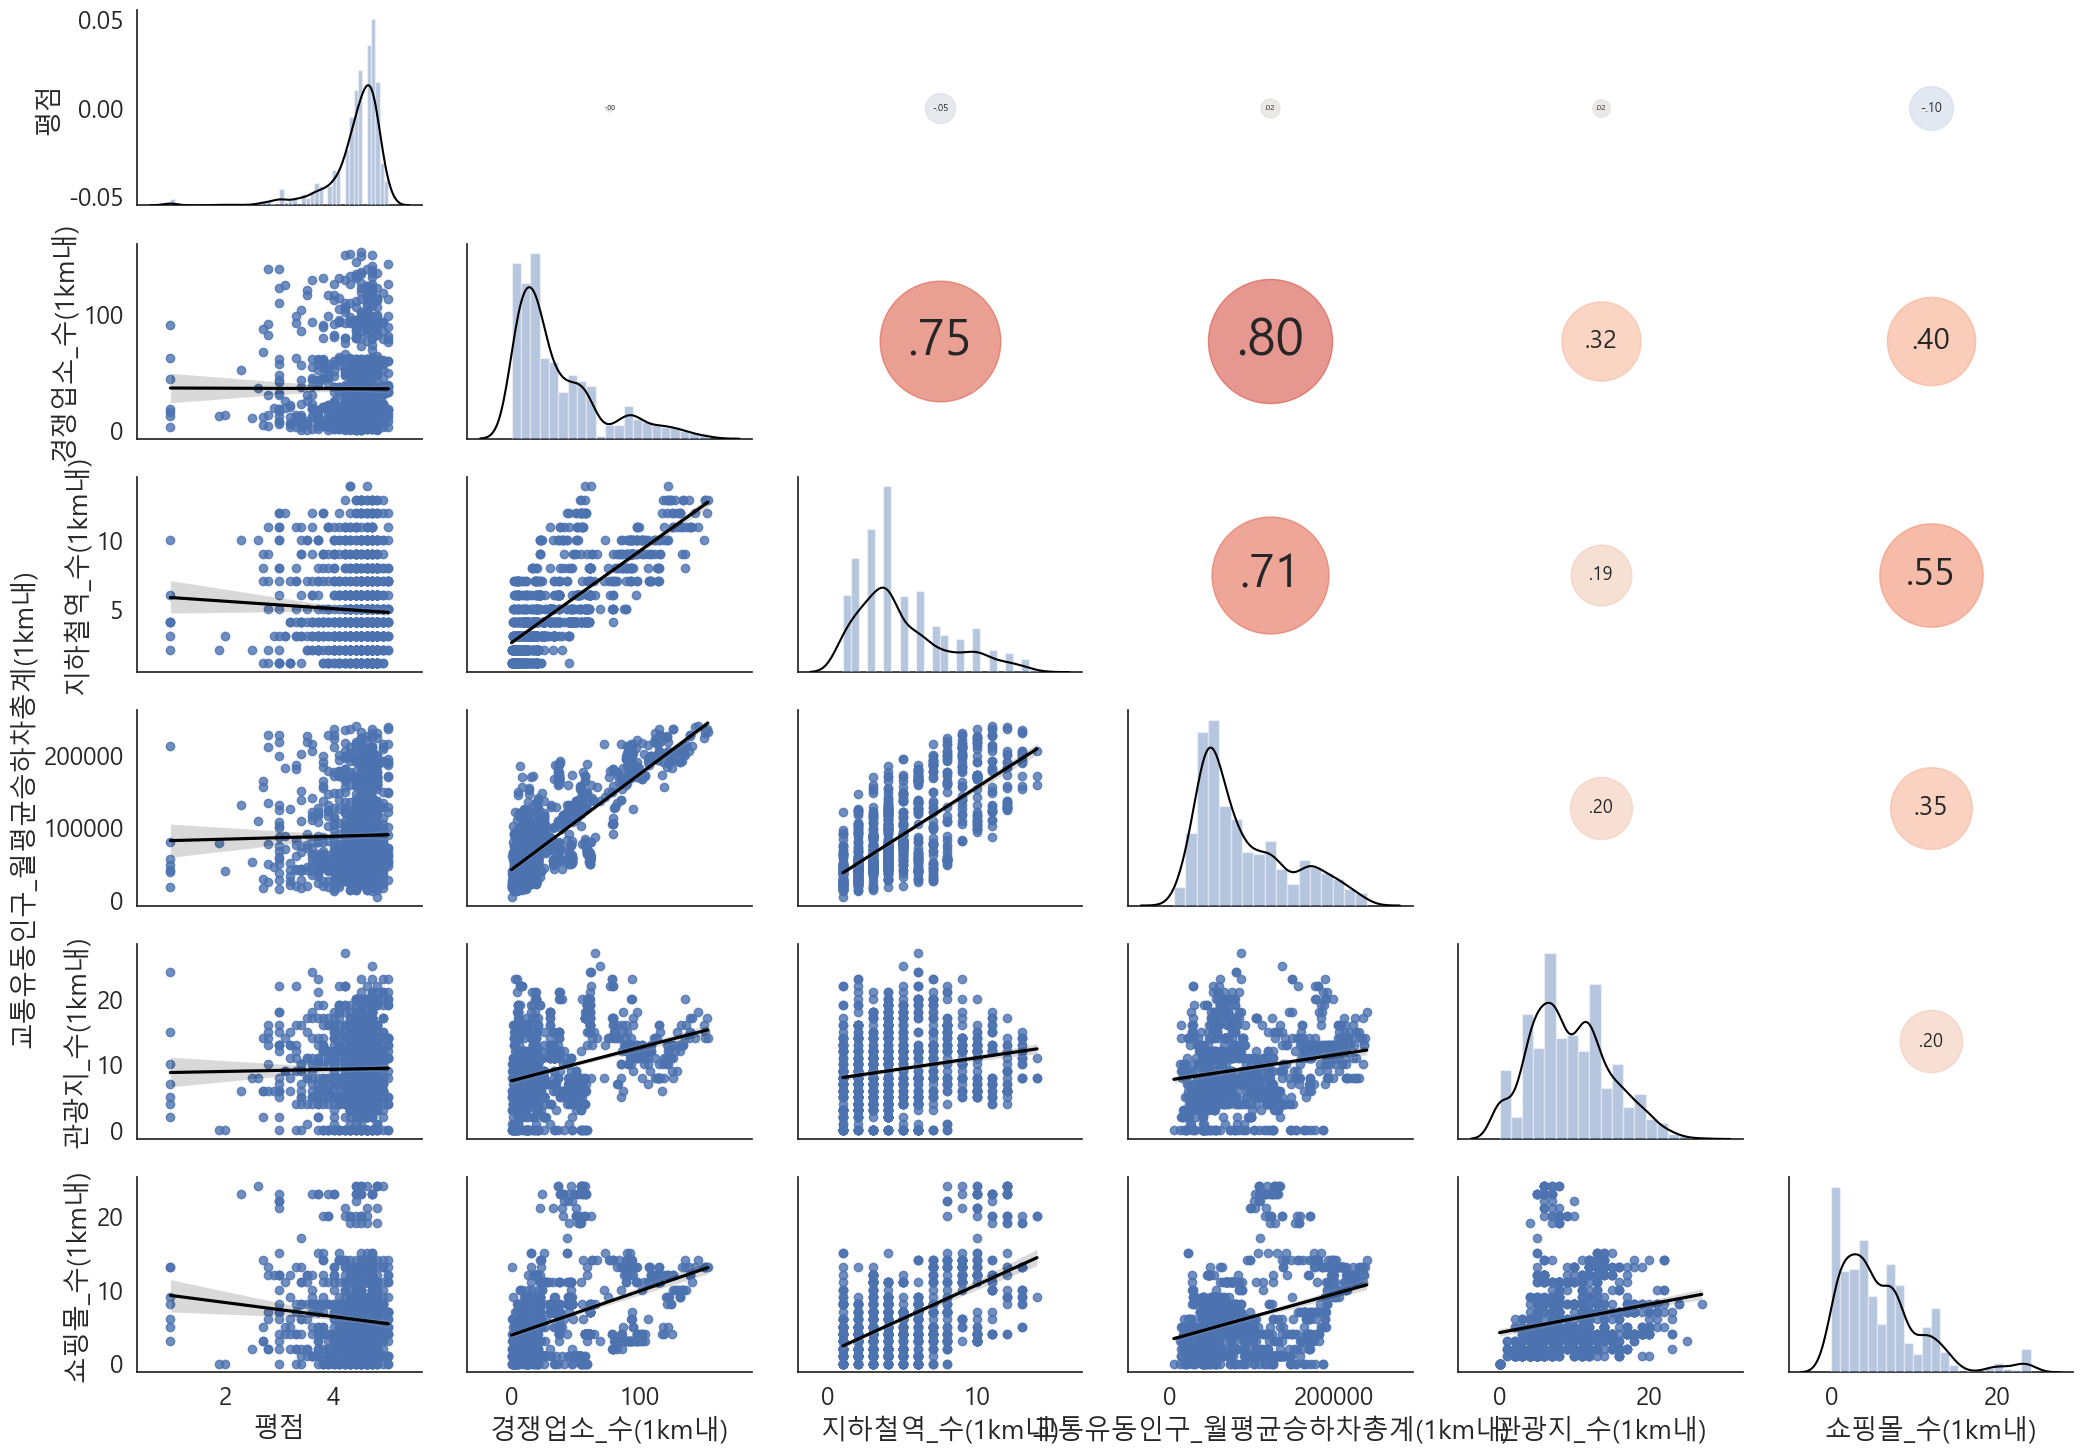

In [12]:
#fig, ax = plt.subplots( figsize=(7,7) )
sns.set(style='white', font_scale=1.6,
        #font="AppleGothic", 
        font='Malgun Gothic',
        rc={"axes.unicode_minus":False})
#g = sns.PairGrid(tour_df_select_dropna2, aspect=1.4, diag_sharey=False)
g = sns.PairGrid(tour_df_select_dropna, aspect=1.4, diag_sharey=False)
#g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
#ax.axhline(y=100)
g.map_lower(sns.regplot, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_11588\3623825787.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel1.dropna(inplace=True)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_11588\3623825787.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel2.dropna(inplace=True)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_11588\3623825787.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel3.dropna(inplace=True)
C:\Users\tjoeun\Ap

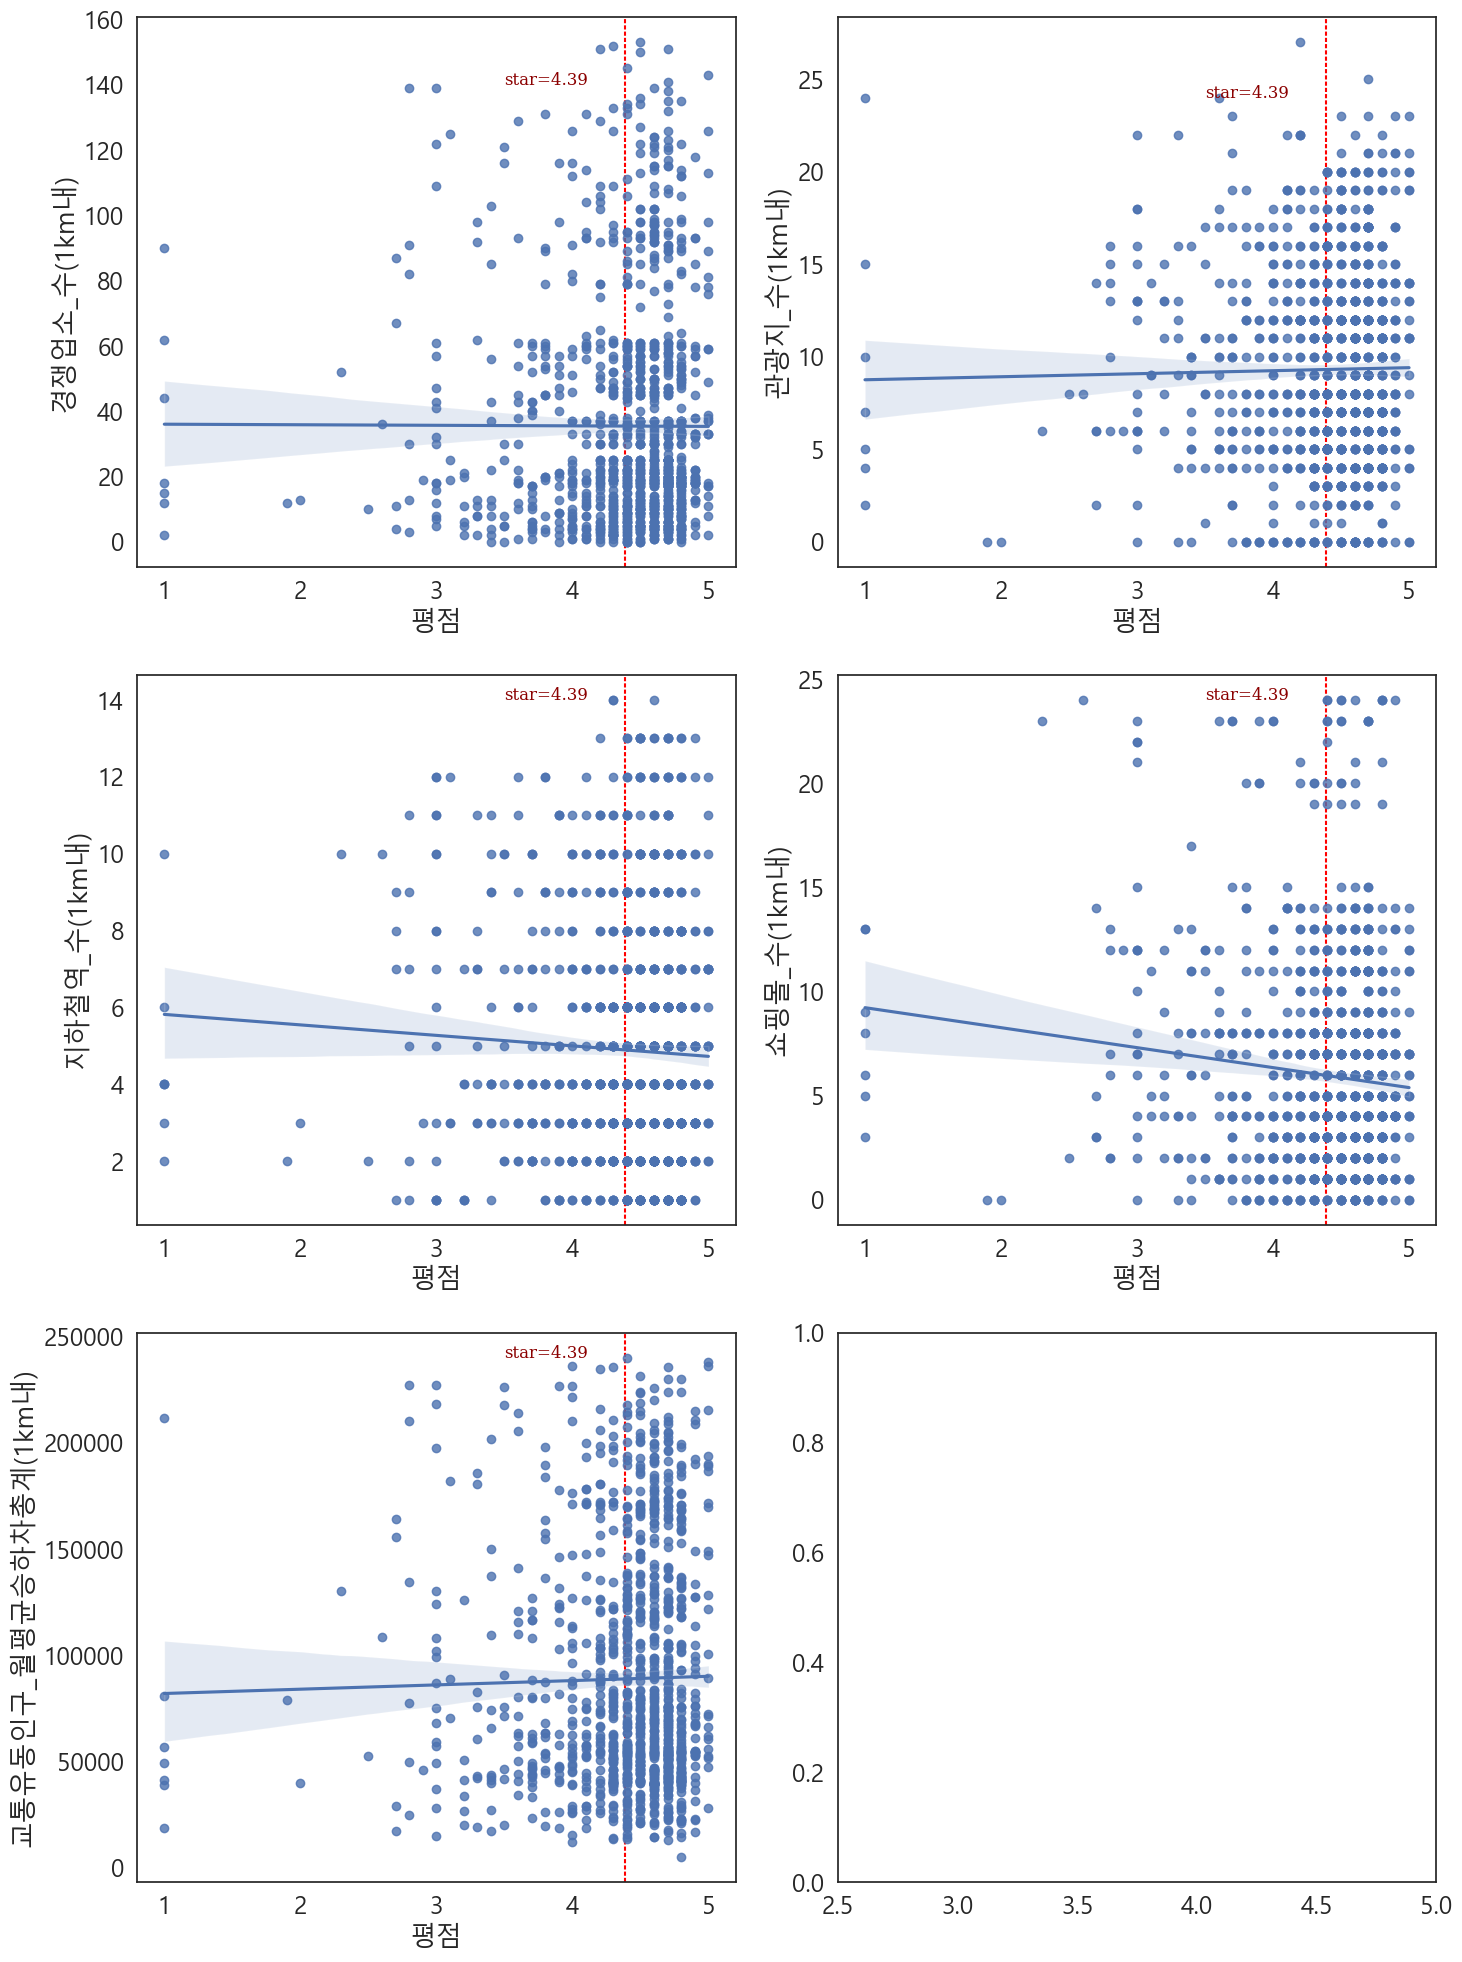

In [13]:
# 개별 scatter plot
fig, ax = plt.subplots(3, 2, figsize=(15, 20))


sel1 = tour_df_select_dropna[['경쟁업소_수(1km내)','평점']]
sel1.dropna(inplace=True)
sel2 = tour_df_select_dropna[['지하철역_수(1km내)','평점']]
sel2.dropna(inplace=True)
sel3 = tour_df_select_dropna[['교통유동인구_월평균승하차총계(1km내)','평점']]
sel3.dropna(inplace=True)
sel4 = tour_df_select_dropna[['관광지_수(1km내)','평점']]
sel4.dropna(inplace=True)
sel5 = tour_df_select_dropna[['쇼핑몰_수(1km내)','평점']]
sel5.dropna(inplace=True)

font1 = {'family': 'serif',
      'color':  'darkred',
      'weight': 'normal',
      'size': 12}


g1 = sns.regplot(x=sel1['평점'], y=sel1['경쟁업소_수(1km내)'], ax=ax[0,0])
ax[0,0].axvline(x=sel1['평점'].mean(),color="red", dashes=(2, 1), zorder=0)
ax[0,0].text(3.5, 140, f'star={sel1["평점"].mean():.2f}', fontdict=font1)
plt.xlim(2.5,5)

g2 = sns.regplot(x=sel2['평점'], y=sel2['지하철역_수(1km내)'], ax=ax[1,0])
ax[1,0].axvline(x=sel2['평점'].mean(),color="red", dashes=(2, 1), zorder=0)
ax[1,0].text(3.5, 14, f'star={sel1["평점"].mean():.2f}', fontdict=font1)
plt.xlim(2.5,5)

g3 = sns.regplot(x=sel3['평점'], y=sel3['교통유동인구_월평균승하차총계(1km내)'], ax=ax[2,0])
ax[2,0].axvline(x=sel3['평점'].mean(),color="red", dashes=(2, 1), zorder=0)
ax[2,0].text(3.5, 240000, f'star={sel3["평점"].mean():.2f}', fontdict=font1)
plt.xlim(2.5,5)

g4 = sns.regplot(x=sel4['평점'], y=sel4['관광지_수(1km내)'], ax=ax[0,1])
ax[0,1].axvline(x=sel3['평점'].mean(),color="red", dashes=(2, 1), zorder=0)
ax[0,1].text(3.5, 24, f'star={sel3["평점"].mean():.2f}', fontdict=font1)
plt.xlim(2.5,5)

g5 = sns.regplot(x=sel5['평점'], y=sel5['쇼핑몰_수(1km내)'], ax=ax[1,1])
ax[1,1].axvline(x=sel3['평점'].mean(),color="red", dashes=(2, 1), zorder=0)
ax[1,1].text(3.5, 24, f'star={sel3["평점"].mean():.2f}', fontdict=font1)
plt.xlim(2.5,5)

fig.tight_layout()